### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта

## ОТЧЕТ ПО КОНТРОЛЬНОЙ РАБОТЕ № 4


### Дисциплина: Методы машинного обучения

##### Студент:  Щербак Маргарита Романовна
##### Группа:   НПИбд-02-21

## Москва 2024
***

### Вариант №15

1. Набор данных: wine_quality

2. Независимые признаки: features/density, features/residual sugar

3. Метка класса: quality

4. Показатель бинарной классификации:

  - 𝑇𝑁 (True Negatives) – число корректно спрогнозированных точек в отрицательном классе

5. Параметры нейронных сетей:

  - Кол-во скрытых слоев: 2

  - Кол-во нейронов в слое: 512

  - Оптимизатор: SGD

  - Функции активации в скрытых слоях: relu, leaky_relu, sigmoid

**Задание 1**   
Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets, включая указанные в задании независимые признаки и метку класса. Оставьте в наборе признаки, принимающие числовые значения.

Загрузим набор данных с информацией о качестве вина на основе физико-химических тестов.

In [ ]:
# !pip install -q tfds-nightly
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds

ds = tfds.load("wine_quality", split='train')
ds

<_PrefetchDataset element_spec={'features': {'alcohol': TensorSpec(shape=(), dtype=tf.float32, name=None), 'chlorides': TensorSpec(shape=(), dtype=tf.float32, name=None), 'citric acid': TensorSpec(shape=(), dtype=tf.float32, name=None), 'density': TensorSpec(shape=(), dtype=tf.float32, name=None), 'fixed acidity': TensorSpec(shape=(), dtype=tf.float32, name=None), 'free sulfur dioxide': TensorSpec(shape=(), dtype=tf.float32, name=None), 'pH': TensorSpec(shape=(), dtype=tf.float32, name=None), 'residual sugar': TensorSpec(shape=(), dtype=tf.float32, name=None), 'sulphates': TensorSpec(shape=(), dtype=tf.float64, name=None), 'total sulfur dioxide': TensorSpec(shape=(), dtype=tf.float32, name=None), 'volatile acidity': TensorSpec(shape=(), dtype=tf.float32, name=None)}, 'quality': TensorSpec(shape=(), dtype=tf.int32, name=None)}>

В наборе присутствуют данные двух независимых признаков features/density и features/residual sugar и метка класса quality.

In [ ]:
dff = tfds.as_dataframe(ds)
dff.head()

,features/alcohol,features/chlorides,features/citric acid,features/density,features/fixed acidity,features/free sulfur dioxide,features/pH,features/residual sugar,features/sulphates,features/total sulfur dioxide,features/volatile acidity,quality
0,9.0,0.054,0.34,1.00080,7.6,44.0,3.22,18.35,0.55,197.0,0.32,5
1,12.2,0.063,0.49,0.99110,6.3,35.0,3.38,1.20,0.42,92.0,0.27,6
2,11.2,0.029,0.11,0.99076,5.3,6.0,3.51,1.10,0.48,51.0,0.43,4
3,9.0,0.110,0.27,0.99672,6.6,20.0,3.08,10.70,0.41,103.0,0.41,6
4,12.0,0.035,0.30,0.99016,5.9,57.0,3.09,3.80,0.34,135.0,0.34,6


In [ ]:
dff.sample(5)

,features/alcohol,features/chlorides,features/citric acid,features/density,features/fixed acidity,features/free sulfur dioxide,features/pH,features/residual sugar,features/sulphates,features/total sulfur dioxide,features/volatile acidity,quality
2892,12.7,0.021,0.32,0.98890,6.7,22.0,3.15,1.4,0.53,121.0,0.480,7
1874,10.9,0.039,0.31,0.99193,6.1,40.0,3.45,1.4,0.59,129.0,0.220,5
615,9.1,0.040,0.35,0.99840,8.8,26.0,2.93,10.7,0.49,183.0,0.230,6
3268,12.1,0.040,0.29,0.98999,5.7,27.0,3.17,3.5,0.36,146.0,0.220,6
2250,14.0,0.036,0.18,0.98746,5.0,33.0,3.21,1.9,0.83,106.0,0.455,7


В наборе все признаки принимают числовые значения, удалять нечего.

In [ ]:
dff.dtypes

features/alcohol                 float32
features/chlorides               float32
features/citric acid             float32
features/density                 float32
features/fixed acidity           float32
features/free sulfur dioxide     float32
features/pH                      float32
features/residual sugar          float32
features/sulphates               float64
features/total sulfur dioxide    float32
features/volatile acidity        float32
quality                            int32
dtype: object

**Задание 2**   
Визуализируйте точки набора данных на плоскости с координатами, соответствующими двум независимым признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду для классов набора данных.

Количество записей с различными значениями признака `quality`:

In [ ]:
dff['quality'].unique() # Показывает уникальные значения классов качества вина

array([5, 6, 4, 8, 7, 3, 9], dtype=int32)

In [ ]:
dff['quality'].value_counts().sort_index() # Показывает количество образцов для каждого класса качества вина

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: count, dtype: int64

Визуализация данных набора "wine_quality" на плоскости с координатами, где ось X представляет плотность (density), а ось Y - остаточный сахар (residual sugar). Для каждого класса качества вина (от 3 до 9) строится диаграмма рассеяния, где каждая точка представляет один образец вина.

Как мы видим, в 9 классе есть 5 образцов. Эти же 5 кружочков изображены светло розовым цветом.

In [ ]:
dss = tfds.as_numpy(ds)
features_density = []
features_residual_sugar = []
labels = []

for example in dss:
    features_density.append(example['features']['density'])
    features_residual_sugar.append(example['features']['residual sugar'])
    labels.append(example['quality'])


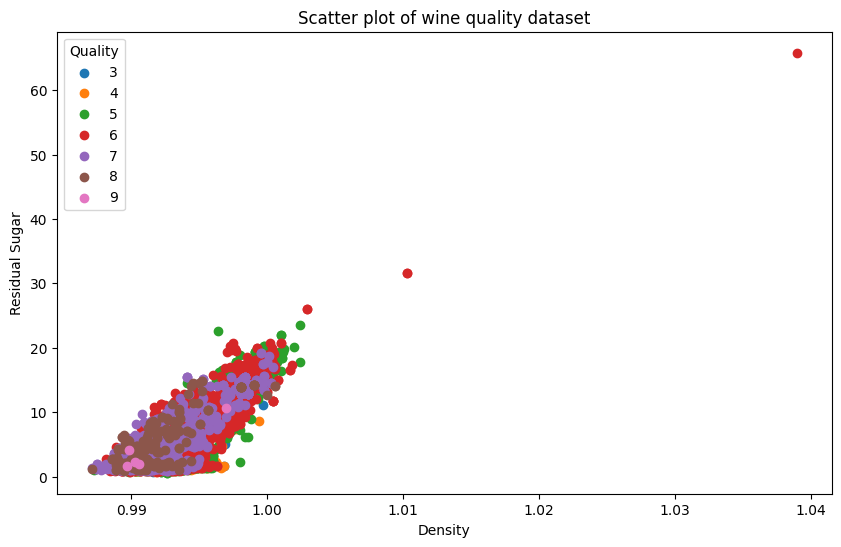

In [ ]:
# Построение графика
plt.figure(figsize=(10, 6))
for label in set(labels):
    plt.scatter(
        [features_density[i] for i in range(len(features_density)) if labels[i] == label],
        [features_residual_sugar[i] for i in range(len(features_residual_sugar)) if labels[i] == label],
        label=label
    )

plt.xlabel('Density')
plt.ylabel('Residual Sugar')
plt.title('Scatter plot of wine quality dataset')
plt.legend(title='Quality')
plt.show()

**Задание 3**  
Если признак с метками классов содержит более двух классов, то объедините некоторые классы, чтобы получить набор для бинарной классификации. Объединяйте классы таким образом, чтобы положительный и отрицательный классы были сопоставимы по количеству точек.  

In [ ]:
dff['quality'].value_counts().sort_index()

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: count, dtype: int64

Преобразуем многоклассовую задачу классификации в задачу бинарной классификации.

Исходно есть 7 классов качества вина (от 3 до 9), каждый с определенным количеством образцов в наборе данных. Создадим новый столбец 'quality', в котором каждому классу качества вина присваивается метка 1, если его значение находится в списке [6, 8, 9], и метка 0 иначе. То есть классы 6, 8 и 9 объединяются в положительный класс (метка 1), а остальные классы объединяются в отрицательный класс (метка 0), чтобы классы были сопоставимы по количеству точек.

In [ ]:
df = dff.copy()
df['quality'] = [1 if x in [6, 8, 9] else 0 for x in df['quality']]
df['quality'].value_counts()


quality
0    2520
1    2378
Name: count, dtype: int64

Таким образом, я перекодировала, чтобы были нули и единицы.

In [ ]:
print(df.head())


   features/alcohol  features/chlorides  features/citric acid  \
0               9.0               0.054                  0.34   
1              12.2               0.063                  0.49   
2              11.2               0.029                  0.11   
3               9.0               0.110                  0.27   
4              12.0               0.035                  0.30   

   features/density  features/fixed acidity  features/free sulfur dioxide  \
0           1.00080                     7.6                          44.0   
1           0.99110                     6.3                          35.0   
2           0.99076                     5.3                           6.0   
3           0.99672                     6.6                          20.0   
4           0.99016                     5.9                          57.0   

   features/pH  features/residual sugar  features/sulphates  \
0         3.22                    18.35                0.55   
1         3.38      

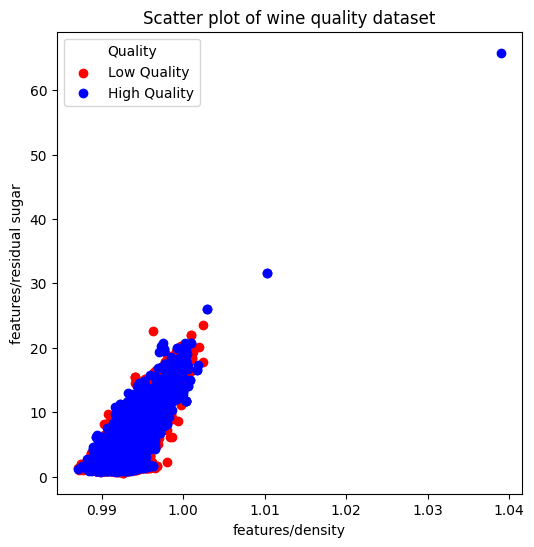

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))

# Отображение точек для классов 0 и 1
plt.scatter(
    df[df['quality'] == 0]['features/density'],
    df[df['quality'] == 0]['features/residual sugar'],
    label='Low Quality',
    color='red'
)
plt.scatter(
    df[df['quality'] == 1]['features/density'],
    df[df['quality'] == 1]['features/residual sugar'],
    label='High Quality',
    color='blue'
)

plt.xlabel('features/density')
plt.ylabel('features/residual sugar')
plt.title('Scatter plot of wine quality dataset')
plt.legend(title='Quality')
plt.show()


**Задание 4**   
Разбейте набор данных из двух признаков и бинарных меток класса на обучающую и тестовую выборки. Постройте нейронные сети с нормализующим слоем и параметрами, указанными в индивидуальном задании, для бинарной классификации и обучите их на обучающей выборке, контролируя процесс обучения нейронных сетей. Определите нейронную сеть с более высоким качеством бинарной классификации по показателю бинарной классификации, указанному в индивидуальном задании.

Построить нейронную сеть для бинарной классификации означает, что функция активации - сигмоида, 1 нейрон в выходном слое и правильная функция потерь. Используем в качестве функции потерь при работе с задачами бинарной классификации binary_crossentropy. В ходе обучения будем отслеживать показатель доля верных ответов (accuracy).

Показатель бинарной классификации:

  - 𝑇𝑁 (True Negatives) – число корректно спрогнозированных точек в отрицательном классе


Для разбиения набора данных на обучающую и тестовую выборки будем использовать функцию `train_test_split`. Создадим синтетический набор данных при помощи функции `make_circles`.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

n_samples = df.shape[0]
df[['features/density', 'features/residual sugar']], df['quality'] = make_circles(n_samples, noise = 0.03, random_state = 42)

x_train, x_test, y_train, y_test = train_test_split(df[['features/density', 'features/residual sugar']], df['quality'], test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

print("Размер обучающей выборки:", x_train.shape)
print("Размер тестовой выборки:", x_test.shape)


Размер обучающей выборки: (3918, 2)
Размер тестовой выборки: (980, 2)


In [ ]:
normalization= tf.keras.layers.Normalization(axis=None,input_shape=(x_train.shape[1],))
normalization.adapt(x_train)

In [ ]:
model_1 = tf.keras.Sequential([
    normalization,
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normaliza  (None, 2)                 3         
 tion)                                                           
                                                                 
 dense_15 (Dense)            (None, 512)               1536      
                                                                 
 dense_16 (Dense)            (None, 512)               262656    
                                                                 
 dense_17 (Dense)            (None, 1)                 513       
                                                                 
Total params: 264708 (1.01 MB)
Trainable params: 264705 (1.01 MB)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


In [ ]:
model_2 = tf.keras.Sequential([
    normalization,
    tf.keras.layers.Dense(512, activation=tf.nn.leaky_relu),
    tf.keras.layers.Dense(512, activation=tf.nn.leaky_relu),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normaliza  (None, 2)                 3         
 tion)                                                           
                                                                 
 dense_18 (Dense)            (None, 512)               1536      
                                                                 
 dense_19 (Dense)            (None, 512)               262656    
                                                                 
 dense_20 (Dense)            (None, 1)                 513       
                                                                 
Total params: 264708 (1.01 MB)
Trainable params: 264705 (1.01 MB)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


In [ ]:
model_3 = tf.keras.Sequential([
    normalization,
    tf.keras.layers.Dense(512, activation='sigmoid'),
    tf.keras.layers.Dense(512, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normaliza  (None, 2)                 3         
 tion)                                                           
                                                                 
 dense_21 (Dense)            (None, 512)               1536      
                                                                 
 dense_22 (Dense)            (None, 512)               262656    
                                                                 
 dense_23 (Dense)            (None, 1)                 513       
                                                                 
Total params: 264708 (1.01 MB)
Trainable params: 264705 (1.01 MB)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


In [ ]:
model_1.compile(
  loss=tf.keras.losses.binary_crossentropy,
  optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
  metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

# Обучение модели
history = model_1.fit( x_train, y_train,
  validation_data=(x_test,y_test),
  epochs=10,
  batch_size=64
)

Epoch 1/10
62/62 [==============================] - 1s 10ms/step - loss: 0.6851 - accuracy: 0.5490 - val_loss: 0.6771 - val_accuracy: 0.5806
Epoch 2/10
62/62 [==============================] - 0s 8ms/step - loss: 0.6681 - accuracy: 0.6478 - val_loss: 0.6583 - val_accuracy: 0.5755
Epoch 3/10
62/62 [==============================] - 0s 8ms/step - loss: 0.6465 - accuracy: 0.6947 - val_loss: 0.6307 - val_accuracy: 0.9439
Epoch 4/10
62/62 [==============================] - 0s 7ms/step - loss: 0.6138 - accuracy: 0.9056 - val_loss: 0.5912 - val_accuracy: 0.8643
Epoch 5/10
62/62 [==============================] - 0s 8ms/step - loss: 0.5638 - accuracy: 0.9331 - val_loss: 0.5295 - val_accuracy: 0.9908
Epoch 6/10
62/62 [==============================] - 0s 7ms/step - loss: 0.4916 - accuracy: 0.9778 - val_loss: 0.4526 - val_accuracy: 0.9796
Epoch 7/10
62/62 [==============================] - 0s 7ms/step - loss: 0.3973 - accuracy: 0.9911 - val_loss: 0.3410 - val_accuracy: 0.9949
Epoch 8/10
62/62 [=

In [ ]:
model_2.compile(
  loss=tf.keras.losses.binary_crossentropy,
  optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
  metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

history = model_2.fit( x_train, y_train,
  validation_data=(x_test,y_test),
  epochs=10,
  batch_size=64
)

Epoch 1/10
62/62 [==============================] - 2s 22ms/step - loss: 0.6877 - accuracy: 0.5158 - val_loss: 0.6797 - val_accuracy: 0.6857
Epoch 2/10
62/62 [==============================] - 1s 19ms/step - loss: 0.6733 - accuracy: 0.6394 - val_loss: 0.6651 - val_accuracy: 0.8990
Epoch 3/10
62/62 [==============================] - 1s 21ms/step - loss: 0.6554 - accuracy: 0.8221 - val_loss: 0.6450 - val_accuracy: 0.5306
Epoch 4/10
62/62 [==============================] - 1s 23ms/step - loss: 0.6312 - accuracy: 0.8208 - val_loss: 0.6137 - val_accuracy: 0.9112
Epoch 5/10
62/62 [==============================] - 1s 24ms/step - loss: 0.5961 - accuracy: 0.9201 - val_loss: 0.5754 - val_accuracy: 0.9816
Epoch 6/10
62/62 [==============================] - 0s 6ms/step - loss: 0.5458 - accuracy: 0.9717 - val_loss: 0.5088 - val_accuracy: 0.9918
Epoch 7/10
62/62 [==============================] - 0s 6ms/step - loss: 0.4744 - accuracy: 0.9837 - val_loss: 0.4382 - val_accuracy: 0.9480
Epoch 8/10
62/6

In [ ]:
model_3.compile(
  loss=tf.keras.losses.binary_crossentropy,
  optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
  metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

# Обучение модели
history = model_3.fit( x_train, y_train,
  validation_data=(x_test,y_test),
  epochs=10,
  batch_size=64
)

Epoch 1/10
62/62 [==============================] - 1s 9ms/step - loss: 1.1136 - accuracy: 0.5117 - val_loss: 0.6944 - val_accuracy: 0.5000
Epoch 2/10
62/62 [==============================] - 0s 7ms/step - loss: 0.8205 - accuracy: 0.4908 - val_loss: 0.7044 - val_accuracy: 0.5000
Epoch 3/10
62/62 [==============================] - 0s 7ms/step - loss: 0.7376 - accuracy: 0.4974 - val_loss: 0.8308 - val_accuracy: 0.5000
Epoch 4/10
62/62 [==============================] - 0s 7ms/step - loss: 0.7287 - accuracy: 0.4929 - val_loss: 0.7078 - val_accuracy: 0.5000
Epoch 5/10
62/62 [==============================] - 0s 7ms/step - loss: 0.7090 - accuracy: 0.4959 - val_loss: 0.7334 - val_accuracy: 0.5000
Epoch 6/10
62/62 [==============================] - 0s 8ms/step - loss: 0.7014 - accuracy: 0.5128 - val_loss: 0.7337 - val_accuracy: 0.5000
Epoch 7/10
62/62 [==============================] - 0s 7ms/step - loss: 0.7078 - accuracy: 0.5033 - val_loss: 0.6960 - val_accuracy: 0.5000
Epoch 8/10
62/62 [==

Третья модель обучается плохо с функцией активации 'sigmoid'. Если изменить на другую ф-ию в скрытых слоях, то модель будет обучаться хорошо, и значение val_accuracy будет расти и близиться к 99.

In [ ]:
def TN(y_true, y_predict):
    assert len(y_true) == len(y_predict)
    return np.sum((y_true == 0) & (y_predict == 0))

# Получение предсказаний каждой модели
y_pred_1 = model_1.predict(x_test).flatten().round()
y_pred_2 = model_2.predict(x_test).flatten().round()
y_pred_3 = model_3.predict(x_test).flatten().round()

# Оценка TN для каждой модели
tn_1 = TN(y_test, y_pred_1)
tn_2 = TN(y_test, y_pred_2)
tn_3 = TN(y_test, y_pred_3)

print("True Negatives для модели 1:", tn_1)
print("True Negatives для модели 2:", tn_2)
print("True Negatives для модели 3:", tn_3)


31/31 [==============================] - 0s 2ms/step
True Negatives для модели 1: 489
True Negatives для модели 2: 487
True Negatives для модели 3: 490


In [ ]:
models = [model_1, model_2, model_3]

for i, model in enumerate(models, start=1):
    loss, accuracy = model.evaluate(x_test, y_test)
    print(f'Модель {i}:')
    print(f'Потери модели на тестовой выборке: {loss}')
    print(f'Доля верных ответов на тестовой выборке: {100*accuracy}')
    print()


31/31 [==============================] - 0s 2ms/step - loss: 0.1172 - accuracy: 0.9969
Модель 1:
Потери модели на тестовой выборке: 0.11721071600914001
Доля верных ответов на тестовой выборке: 99.69387650489807

31/31 [==============================] - 0s 3ms/step - loss: 0.2064 - accuracy: 0.9827
Модель 2:
Потери модели на тестовой выборке: 0.20642207562923431
Доля верных ответов на тестовой выборке: 98.26530814170837

31/31 [==============================] - 0s 3ms/step - loss: 0.7455 - accuracy: 0.5000
Модель 3:
Потери модели на тестовой выборке: 0.7454850077629089
Доля верных ответов на тестовой выборке: 50.0



**Задание 5**   
Визуализируйте границы принятия решений построенных нейронных сетей на отдельных рисунках на всем наборе данных из двух признаков и бинарных меток классов.  

In [ ]:
def plot_decision_boundary(model, X, y):
    # Найдем диапазоны изменения по осям и построим сетку
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    # Набор данных для прогнозирования
    X_in = np.c_[xx.ravel(), yy.ravel()]
    # Прогноз при помощи обученной модели
    y_pred = model.predict(X_in)
    # Используем функцию round для бинарной классификации
    y_pred = np.round(y_pred).reshape(xx.shape)
    # Рисуем границу решения
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.xlabel('density')
    plt.ylabel('residual sugar')


313/313 [==============================] - 1s 3ms/step


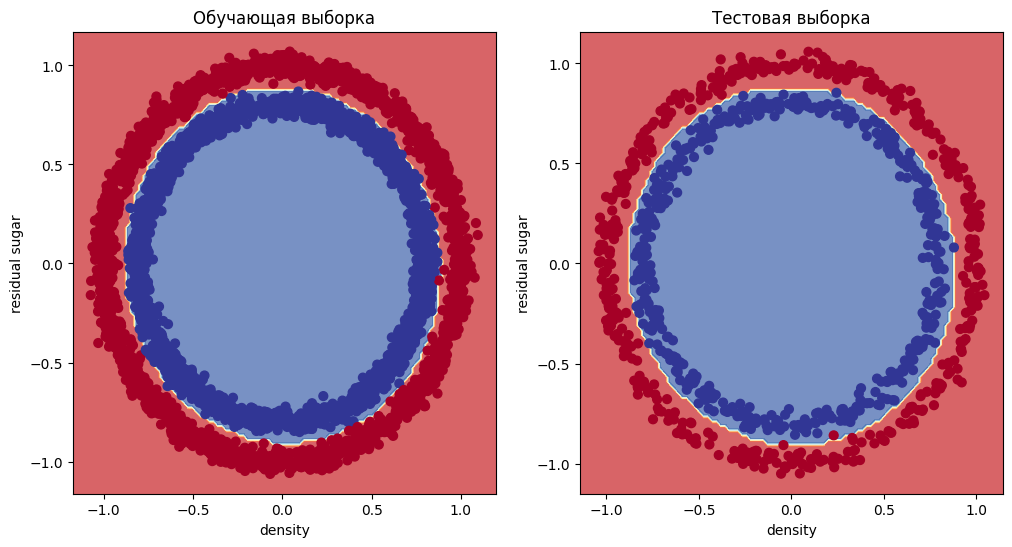

In [ ]:
X_train_np = x_train.to_numpy()
X_test_np = x_test.to_numpy()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Обучающая выборка")
plot_decision_boundary(model_1, X=X_train_np, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Тестовая выборка")
plot_decision_boundary(model_1, X=X_test_np, y=y_test)


313/313 [==============================] - 1s 2ms/step


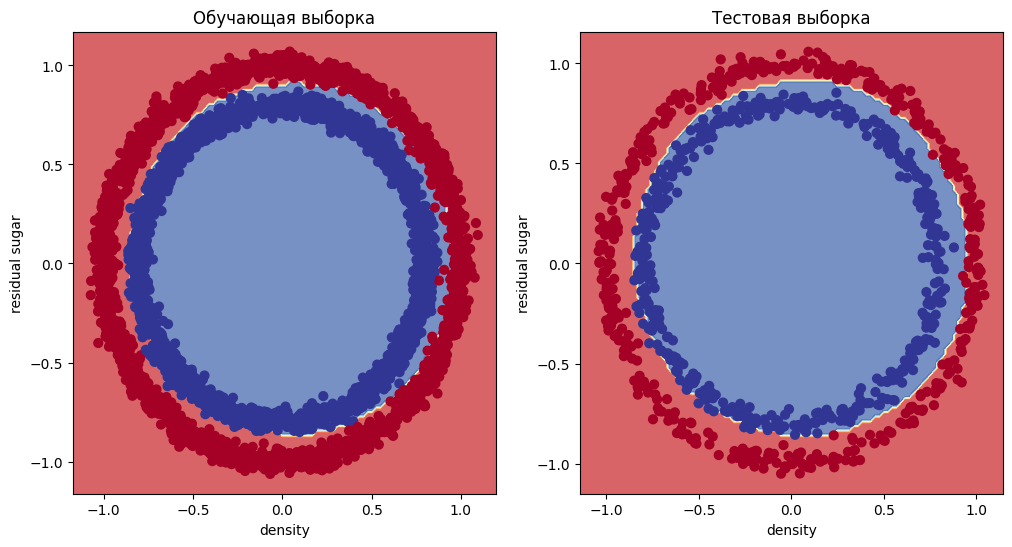

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Обучающая выборка")
plot_decision_boundary(model_2, X=X_train_np, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Тестовая выборка")
plot_decision_boundary(model_2, X=X_test_np, y=y_test)

313/313 [==============================] - 1s 2ms/step


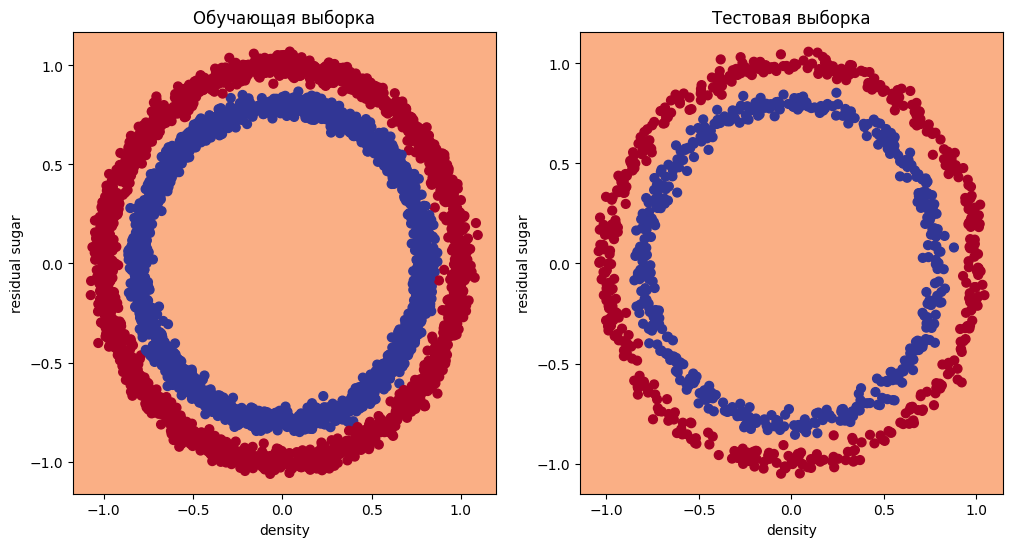

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Обучающая выборка")
plot_decision_boundary(model_3, X=X_train_np, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Тестовая выборка")
plot_decision_boundary(model_3, X=X_test_np, y=y_test)

Для дальнейшего использования в многоклассовом случае лучше всего подходит Модель 1, так как она имеет самую высокую долю верных ответов (по сравнению с другими), наименьшие потери и хороший результат по метрике True Negatives.

**Задание 6**  
Визуализируйте на одном рисунке ROC-кривые для построенных классификаторов на основе нейронных сетей, вычислите площади под ROC-кривыми методом трапеций или иным методом и создайте легенду с указанием площадей кривых.


Площадь под ROC кривой, обозначаемая $AUC$, может быть использована как мера качества классификатора. Так как общая площадь квадрата равна $1$, показатель $AUC$ находится в интервале $\left[0,\,1\right]$ (чем больше, тем лучше).

31/31 [==============================] - 0s 2ms/step


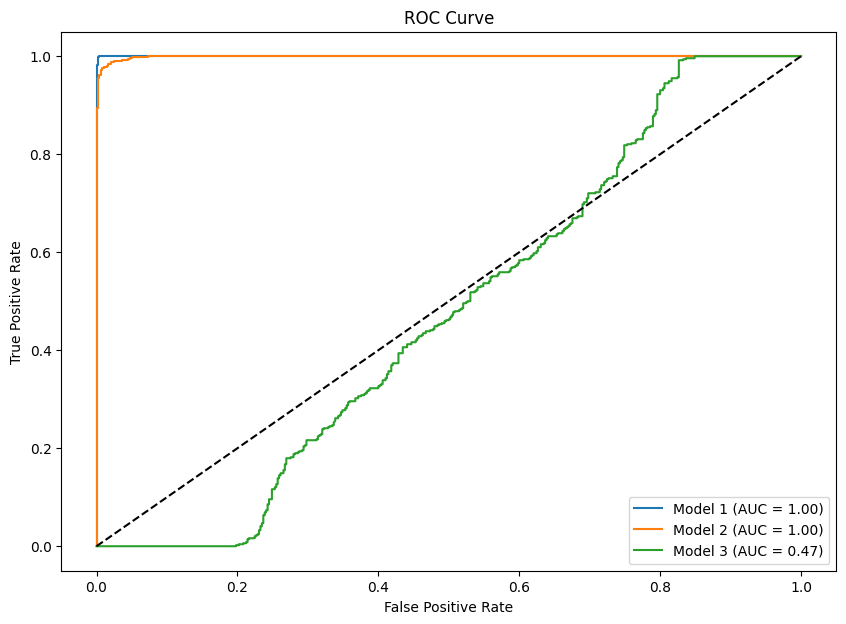

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Функция для построения ROC-кривой и вычисления AUC для одной модели
def plot_roc_curve(model, X, y, label):
    # Получаем вероятности принадлежности к положительному классу
    probabilities = model.predict(X)
    # Вычисляем значения FPR (False Positive Rate), TPR (True Positive Rate) и пороги
    fpr, tpr, thresholds = roc_curve(y, probabilities)
    # Вычисляем AUC (Area Under the Curve)
    auc_score = roc_auc_score(y, probabilities)
    # Строим ROC-кривую для текущей модели
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc_score:.2f})')

plt.figure(figsize=(10, 7))
plot_roc_curve(model_1, x_test, y_test, label='Model 1')
plot_roc_curve(model_2, x_test, y_test, label='Model 2')
plot_roc_curve(model_3, x_test, y_test, label='Model 3')

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [ ]:
auc_model_1 = roc_auc_score(y_test, model_1.predict(x_test))
auc_model_2 = roc_auc_score(y_test, model_2.predict(x_test))
auc_model_3 = roc_auc_score(y_test, model_3.predict(x_test))

print("AUC для Model 1:", auc_model_1)
print("AUC для Model 2:", auc_model_2)
print("AUC для Model 3:", auc_model_3)


31/31 [==============================] - 0s 4ms/step
AUC для Model 1: 0.9999583506872136
AUC для Model 2: 0.998987921699292
AUC для Model 3: 0.4729758433985839


**Задане 7**  
Определите в исходном наборе данных дополнительный признак, отличный от указанных в задании двух независимых признаков, принимающий непрерывные значения и имеющий максимальную дисперсию.

In [ ]:
dff.dtypes

features/alcohol                 float32
features/chlorides               float32
features/citric acid             float32
features/density                 float32
features/fixed acidity           float32
features/free sulfur dioxide     float32
features/pH                      float32
features/residual sugar          float32
features/sulphates               float64
features/total sulfur dioxide    float32
features/volatile acidity        float32
quality                            int32
dtype: object

Как мы видим, в исходном наборе данных только quality не имеет непрерывные значения.

In [ ]:
# Вычисляем дисперсию для каждого признака в исходном наборе данных
variances = dff.var()

max_variance_feature = variances.idxmax()
max_variance = variances.max()

print("Признак с максимальной дисперсией:", max_variance_feature)
print("Максимальная дисперсия:", max_variance)


Признак с максимальной дисперсией: features/total sulfur dioxide
Максимальная дисперсия: 1806.08544921875


**Задание 8**   
Визуализируйте точки набора данных в трехмерном пространстве с координатами, соответствующими трем независимым признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду для классов набора данных.

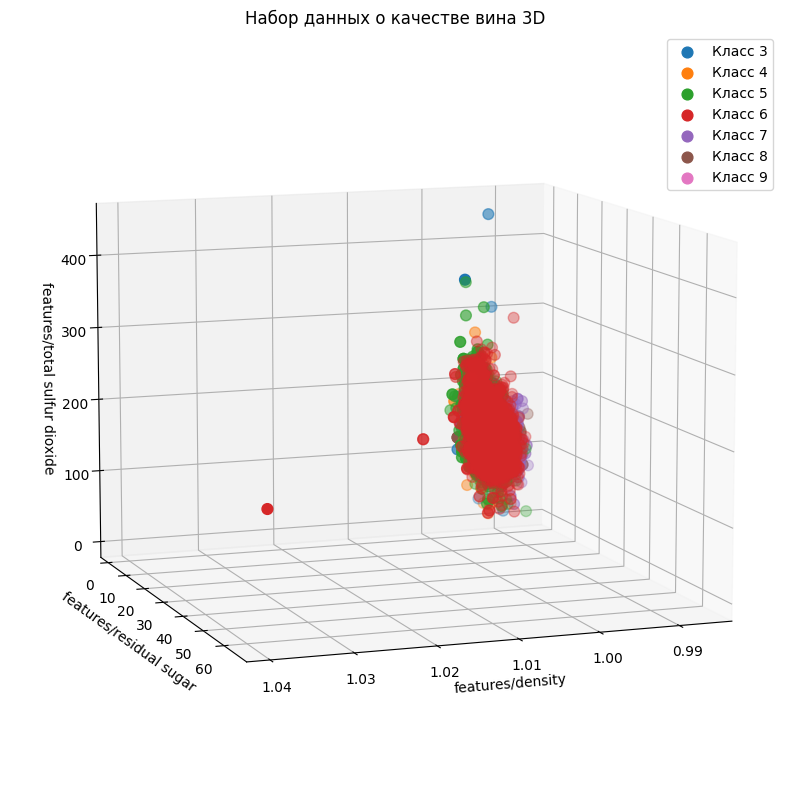

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

dfmc = dff[['features/density', 'features/residual sugar', 'features/total sulfur dioxide', 'quality']]
cm = sorted(dfmc['quality'].unique())
cmd = {c: dfmc[dfmc['quality'] == c] for c in cm}

# Выбираем цветовую карту
cmap = plt.get_cmap('tab10')

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Визуализируем данные для каждого класса
for i, c in enumerate(cm):
    ax.scatter(cmd[c]['features/density'],
               cmd[c]['features/residual sugar'],
               cmd[c]['features/total sulfur dioxide'],
               label=f'Класс {c}', color=cmap(i), s=60)


ax.set_xlabel('features/density')
ax.set_ylabel('features/residual sugar')
ax.set_zlabel('features/total sulfur dioxide')
ax.set_title('Набор данных о качестве вина 3D')
ax.view_init(elev=10, azim=70)
plt.legend()
plt.show()


**Задание 9**   
Разбейте исходный набор данных на обучающую и тестовую выборки. Постройте нейронную сеть для многоклассовой классификации с нормализующим слоем и параметрами, соответствующими лучшей нейронной сети для бинарной классифиации из п.4, и обучите ее на обучающей выборке, контролируя процесс ее обучения.

In [ ]:
# Разделение на признаки и целевую переменную
X=dff.drop('quality',axis=1)
y=dff['quality']

In [ ]:
y.unique()

array([5, 6, 4, 8, 7, 3, 9], dtype=int32)

In [ ]:
from sklearn.model_selection import train_test_split

def to_one_hot(labels, dimension=7):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label-3] = 1.
    return results

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = to_one_hot(y_train)
y_test = to_one_hot(y_test)

In [ ]:

normalization = tf.keras.layers.Normalization(axis=None, input_shape=(X.shape[1],))
normalization.adapt(X_train)


model_multiclass = tf.keras.Sequential([
    normalization,
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

model_multiclass.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normaliza  (None, 11)                3         
 tion)                                                           
                                                                 
 dense_24 (Dense)            (None, 512)               6144      
                                                                 
 dense_25 (Dense)            (None, 512)               262656    
                                                                 
 dense_26 (Dense)            (None, 7)                 3591      
                                                                 
Total params: 272394 (1.04 MB)
Trainable params: 272391 (1.04 MB)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


In [ ]:
model_multiclass.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-2),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=["accuracy"])

# Обучение модели
history = model_multiclass.fit(X_train, y_train,
                    epochs=50,
                    verbose=1,
                    batch_size=64,
                    validation_split=0.2)

test_loss, accuracy = model_multiclass.evaluate(X_test, y_test, verbose=1)
print(f"Точность на тестовых данных: {accuracy}")

Epoch 1/50
49/49 [==============================] - 1s 12ms/step - loss: 1.1538 - accuracy: 0.4710 - val_loss: 0.8381 - val_accuracy: 0.4987
Epoch 2/50
49/49 [==============================] - 0s 7ms/step - loss: 0.7886 - accuracy: 0.4812 - val_loss: 0.7507 - val_accuracy: 0.4809
Epoch 3/50
49/49 [==============================] - 0s 7ms/step - loss: 0.7398 - accuracy: 0.4901 - val_loss: 0.7291 - val_accuracy: 0.4974
Epoch 4/50
49/49 [==============================] - 0s 7ms/step - loss: 0.7235 - accuracy: 0.4968 - val_loss: 0.7168 - val_accuracy: 0.5000
Epoch 5/50
49/49 [==============================] - 0s 7ms/step - loss: 0.7154 - accuracy: 0.4997 - val_loss: 0.7148 - val_accuracy: 0.4974
Epoch 6/50
49/49 [==============================] - 0s 7ms/step - loss: 0.7112 - accuracy: 0.5013 - val_loss: 0.7078 - val_accuracy: 0.5000
Epoch 7/50
49/49 [==============================] - 0s 7ms/step - loss: 0.7078 - accuracy: 0.4923 - val_loss: 0.7061 - val_accuracy: 0.4974
Epoch 8/50
49/49 [=

Нейросеть, к сожалению, не очень успешно обучается. Потери уменьшаются, но доля верных ответов +- стабильна около 50%

**Задание 10**   
Постройте кривые обучения в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду.

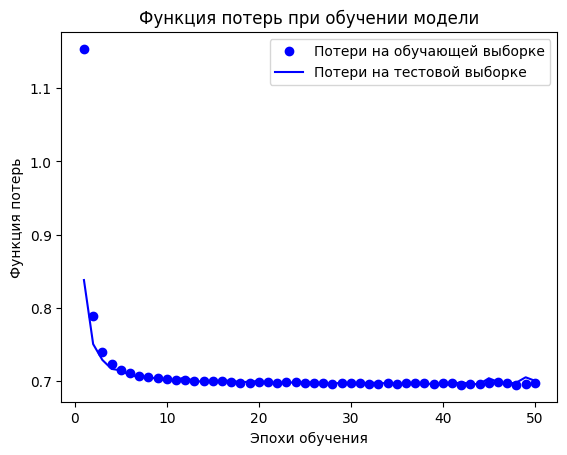

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Потери на обучающей выборке")
plt.plot(epochs, val_loss, "b", label="Потери на тестовой выборке")
plt.title("Функция потерь при обучении модели")
plt.xlabel("Эпохи обучения")
plt.ylabel("Функция потерь")
plt.legend();